# INTELLIGENCE-DRIVEN GREEDY ALGORITHM

## PREPARING THE ENVIRONMENT

Importing the relevant libraries:

In [1]:
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

Declaring the auxiliary functions:

In [2]:
def extract_features(file):
    return [int(n)
            for n in re.findall(r'\d+(?=_)', file)]

Defining the constants:

In [3]:
sizes = {
    1 :  1,
    2 : 20,
    3 : 50,
}

conflicts = {
    0  :  0.0,
    1  :  0.1,
    2  :  0.2,
    3  :  0.3,
    4  :  0.4,
    5  :  0.5,
    6  :  0.6,
    7  :  0.7,
    8  :  0.8,
    9  :  0.9,
    10 : 0.95,
    11 : 0.99,
}

## PRE-PROCESSING

Loading the training data:

In [4]:
data_train1 = pd.read_csv('../out/results_v3_train.txt', delimiter=' ')

data_train1.head()

,instance,obj_greddy,time_greedy,obj_lnsa,time_lnsa
0,instances/train/Correia_Random_2_3_1_7.txt,15350,0,15350,3
1,instances/train/Correia_Random_2_1_1_8.txt,10350,0,10180,2
2,instances/train/Correia_Random_2_2_9_3.txt,12900,0,12500,2
3,instances/train/Correia_Random_1_2_4_9.txt,6230,0,6090,1
4,instances/train/Correia_Random_1_2_0_9.txt,6240,0,6070,0


In [5]:
data_train2 = pd.read_csv('../out/results_v4_train.txt', delimiter=' ')

data_train2.head()

,instance,obj_greddy,time_greedy,obj_lnsa,time_lnsa
0,instances/train/Correia_Random_2_3_1_7.txt,15350,0,15350,2
1,instances/train/Correia_Random_2_1_1_8.txt,10370,0,10180,1
2,instances/train/Correia_Random_2_2_9_3.txt,13000,0,12520,4
3,instances/train/Correia_Random_1_2_4_9.txt,6220,0,6090,0
4,instances/train/Correia_Random_1_2_0_9.txt,6230,0,6070,0


In [6]:
features = data_train1['instance'].apply(lambda x: pd.Series(extract_features(x)))

data_train = pd.DataFrame({
    'number_items'  : features[0],
    'items_sizes'   : features[1].map(sizes),
    'graph_density' : features[2].map(conflicts),
    'greedy1'       : data_train1.obj_greddy,
    'greedy2'       : data_train2.obj_greddy,
    'best'          : np.where(data_train2.obj_greddy <= data_train1.obj_greddy, 1, 0)
})

data_train.head()

,number_items,items_sizes,graph_density,greedy1,greedy2,best
0,2,50,0.1,15350,15350,1
1,2,1,0.1,10350,10370,0
2,2,20,0.9,12900,13000,0
3,1,20,0.4,6230,6220,1
4,1,20,0.0,6240,6230,1


Loading the test data:

In [7]:
data_test1 = pd.read_csv('../out/results_v3_test.txt', delimiter=' ')

data_test1.head()

,instance,obj_greddy,time_greedy,obj_lnsa,time_lnsa
0,instances/test/Correia_Random_1_2_0_3.txt,6390,0,6310,0
1,instances/test/Correia_Random_1_1_9_7.txt,5780,0,5290,1
2,instances/test/Correia_Random_1_1_6_7.txt,5310,0,4940,1
3,instances/test/Correia_Random_1_3_7_4.txt,7900,0,7900,0
4,instances/test/Correia_Random_1_1_2_4.txt,4690,0,4610,0


In [8]:
data_test2 = pd.read_csv('../out/results_v4_test.txt', delimiter=' ')

data_test2.head()

,instance,obj_greddy,time_greedy,obj_lnsa,time_lnsa
0,instances/test/Correia_Random_1_2_0_3.txt,6360,0,6320,0
1,instances/test/Correia_Random_1_1_9_7.txt,6080,0,5320,0
2,instances/test/Correia_Random_1_1_6_7.txt,5180,0,4940,0
3,instances/test/Correia_Random_1_3_7_4.txt,7900,0,7900,0
4,instances/test/Correia_Random_1_1_2_4.txt,4700,0,4610,0


In [9]:
features = data_test1['instance'].apply(lambda x: pd.Series(extract_features(x)))

data_test = pd.DataFrame({
    'number_items'  : features[0],
    'items_sizes'   : features[1].map(sizes),
    'graph_density' : features[2].map(conflicts),
    'greedy1'       : data_test1.obj_greddy,
    'greedy2'       : data_test2.obj_greddy,
    'best'          : np.where(data_test2.obj_greddy <= data_test1.obj_greddy, 1, 0)
})

data_test.head()

,number_items,items_sizes,graph_density,greedy1,greedy2,best
0,1,20,0.0,6390,6360,1
1,1,1,0.9,5780,6080,0
2,1,1,0.6,5310,5180,1
3,1,50,0.7,7900,7900,1
4,1,1,0.2,4690,4700,0


## EDA

Exploratory data analysis:

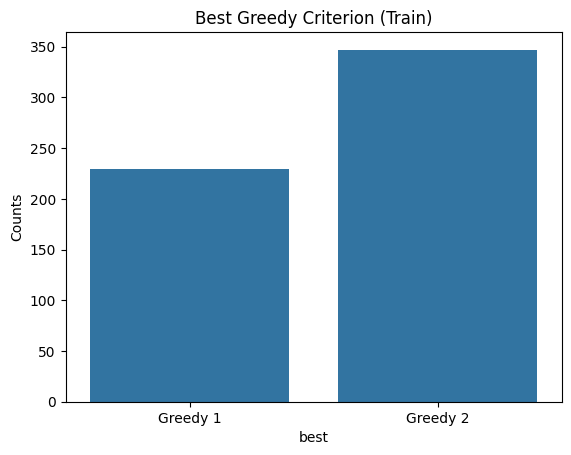

In [10]:
sns.countplot(x=data_train.best)

plt.title('Best Greedy Criterion (Train)')
plt.xticks(ticks=[0, 1], labels=['Greedy 1', 'Greedy 2'])
plt.ylabel('Counts')

plt.show()

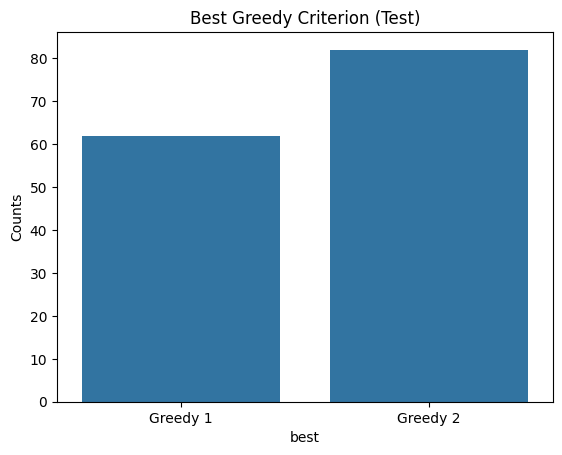

In [11]:
sns.countplot(x=data_test.best)

plt.title('Best Greedy Criterion (Test)')
plt.xticks(ticks=[0, 1], labels=['Greedy 1', 'Greedy 2'])
plt.ylabel('Counts')

plt.show()

## DECISION TREE

Training the decision tree:

In [12]:
X_train = data_train[['number_items', 'items_sizes', 'graph_density']].to_numpy()
y_train = data_train['best'].to_numpy()

X_train, y_train = RandomUnderSampler(random_state=123).fit_resample(X_train, y_train)

X_test = data_test[['number_items', 'items_sizes', 'graph_density']].to_numpy()
y_test = data_test['best'].to_numpy()

print('Number of samples in training =', X_train.shape[0])
print('Number of samples in the test =', X_test.shape[0] )

Number of samples in training = 458
Number of samples in the test = 144


In [13]:
clf = DecisionTreeClassifier(max_depth=4)
ccp_alphas = clf.cost_complexity_pruning_path(X_train, y_train).ccp_alphas

param_grid = {'ccp_alpha' : ccp_alphas[ccp_alphas > 0]}

CV_clf_tree = GridSearchCV(clf, param_grid)
CV_clf_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'ccp_alpha': array([0.00367944, 0.00447509, 0.00522868, 0.00878197, 0.01667155,
       0.03835201, 0.18154762])})

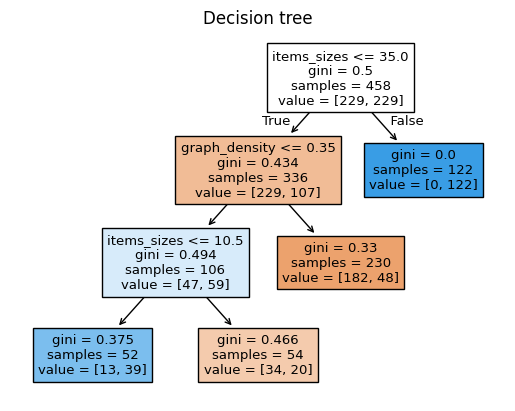

In [14]:
plot_tree(CV_clf_tree.best_estimator_,
          feature_names=data_train.columns,
          filled=True)
plt.title('Decision tree')

plt.show()

In [15]:
print('Getting the relevants features:')

print()

for i, v in enumerate(CV_clf_tree.best_estimator_.feature_importances_):
    if v:
        print(f'X[{i}] = {data_train.columns[i]} ({v})')

Getting the relevants features:

X[1] = items_sizes (0.83788386126395)
X[2] = graph_density (0.16211613873605)


In [16]:
clf = CV_clf_tree.best_estimator_

print("Analyzing the results obtained with DecisionTreeClassifier:")

print()

print(f"Ein = {(1 - clf.score(X_train, y_train))*100:.2f}%")
print(f"Eout = {(1 - clf.score(X_test, y_test))*100:.2f}%")

print()
print(pd.DataFrame(confusion_matrix(y_test, clf.predict(X_test)),
                   index  =['f(x)=0', 'f(x)=+1'],
                   columns=['h(x)=0', 'h(x)=+1']))

print()
print(classification_report(y_test, clf.predict(X_test)))

Analyzing the results obtained with DecisionTreeClassifier:

Ein = 17.69%
Eout = 15.28%

         h(x)=0  h(x)=+1
f(x)=0       60        2
f(x)=+1      20       62

              precision    recall  f1-score   support

           0       0.75      0.97      0.85        62
           1       0.97      0.76      0.85        82

    accuracy                           0.85       144
   macro avg       0.86      0.86      0.85       144
weighted avg       0.87      0.85      0.85       144



## EVALUATING

Evaluating the result obtained in the prescription:

In [17]:
predictions = clf.predict(data_train[['number_items', 'items_sizes', 'graph_density']].to_numpy())

data_train['predict'] = predictions
data_train['smart'  ] = np.where(predictions, data_train.greedy2, data_train.greedy1)

predictions = clf.predict(data_test[['number_items', 'items_sizes', 'graph_density']].to_numpy())

data_test['predict']  = predictions
data_test['smart'  ]  = np.where(predictions, data_test.greedy2 , data_test.greedy1 )

In [18]:
best_train = np.where(data_train.greedy2 <= data_train.greedy1, data_train.greedy2, data_train.greedy1)
best_test  = np.where(data_test.greedy2  <= data_test.greedy1 , data_test.greedy2 , data_test.greedy1 )

cond_train = {
    'Greedy 1 wins'     : data_train.greedy1 == best_train,
    'Greedy 2 wins'     : data_train.greedy2 == best_train,
    'Smart greedy wins' : data_train.smart   == best_train
}
cond_test  = {
    'Greedy 1 wins'     : data_test.greedy1 == best_test,
    'Greedy 2 wins'     : data_test.greedy2 == best_test,
    'Smart greedy wins' : data_test.smart   == best_test
}

print('Checking improvement in training instances:')
print()
for label, condition in cond_train.items():
    print(f'{label} = {condition.sum()}')

print()
print()

print('Checking improvement in test instances:')
print()
for label, condition in cond_test.items():
    print(f'{label} = {condition.sum()}')

Checking improvement in training instances:

Greedy 1 wins = 441
Greedy 2 wins = 347
Smart greedy wins = 476


Checking improvement in test instances:

Greedy 1 wins = 115
Greedy 2 wins = 82
Smart greedy wins = 124
